In [1]:
import pandas as pd
import numpy as np

In [23]:
xgb_21 = pd.read_csv("XGB_21_jan.csv")
lgbm_best = pd.read_csv("lgbm-mmmm.csv")
lgbm_2000 = pd.read_csv("lgbm_2000_n_est.csv")
cat_b = pd.read_csv("submission_cat (1).csv")
lgbm_ork = pd.read_csv("submission_lgb.csv")
xgb_200 = pd.read_csv("submission_xgb_best_params1_200_trials.csv")
xgb_250 = pd.read_csv("submission_xgb_best_params1_250_trials_imputed_median.csv")
xgb_god = pd.read_csv("submission_god_xgb.csv")
blend_cb = pd.read_csv("spp-1-v1-test-spp-BLEND-CB-2-0.5767.csv")
blend_nn = pd.read_csv("spp-1-v1-test-spp-BLEND-NN-1-0.5772.csv")
blend_xgb = pd.read_csv("spp-1-v1-test-spp-BLEND-XGB-2-0.5752.csv")
blend_it_cb = pd.read_csv('spp-1-v2-test_iterative_impu_spp-CB-8-0.5855.csv')
blend_it_lgbm = pd.read_csv("spp-1-v2-test_iterative_impu_spp-LGB-4-0.5872.csv")
blend_it_xgb = pd.read_csv("spp-1-v2-test_iterative_impu_spp-XGB-2-0.5822.csv")
hgb_31 = pd.read_csv("submission_hgb_31st_jan.csv")
xgb_31 = pd.read_csv("submission_xgb_31st_jan_auc_0.5862703677912057.csv")
xgb_reg_31 = pd.read_csv("submission_xgb_regressor_31_jan.csv")
fed_xgb = pd.read_csv('submission_Fed_xgb_31_jan.csv')
fed_LR = pd.read_csv("spp-regression-v1-Fed_test-BLEND-LR-3-0.4769.csv")
fed_cb = pd.read_csv('spp-regression-v1-Fed_test-BLEND-CB-1-0.4771.csv')
fed_blend_nn = pd.read_csv('spp-1-v1-Fed_test-BLEND-NN-2-0.5786.csv')
fed_blend_lr = pd.read_csv('spp-1-v1-Fed_test-BLEND-LR-3-0.5787.csv')
fel_blend_cb = pd.read_csv('spp-1-v1-Fed_test-BLEND-CB-2-0.5784.csv')
lgbm_61075 = pd.read_csv('lgbm_61075.csv')
lgb_01_02 = pd.read_csv('lgb_01_02.csv')
auto_gmy = pd.read_csv('Auto_gmy_submission_0.5807AUCCV.csv')



In [9]:
blend_it_cb.rename(columns = {'pred_song_popularity_1.0': 'song_popularity'}, inplace=True)
blend_it_xgb.rename(columns = {'pred_song_popularity_1.0': 'song_popularity'}, inplace=True)


In [11]:
list_of_subs = [xgb_21.song_popularity, 
                lgbm_best.song_popularity, 
                lgbm_2000.song_popularity,
                cat_b.song_popularity, 
                lgbm_ork.song_popularity,
                xgb_200.song_popularity,
                xgb_250.song_popularity, 
                xgb_god.song_popularity, 
                blend_cb.song_popularity,
                blend_nn.song_popularity, 
                blend_xgb.song_popularity, 
                blend_it_cb.song_popularity,
                blend_it_lgbm.song_popularity, 
                blend_it_xgb.song_popularity,
                hgb_31.song_popularity, 
                #xgb_31.song_popularity, 
                xgb_reg_31.song_popularity]

group_labels = ['xgb_21', 
                'lgbm_best', 
                'lgbm_2000',
                'cat_b',
                'lgbm_ork', 
                'xgb_200',
                'xgb_250', 
                'xgb_god',
                'blend_cb',
                'blend_nn', 
                'blend_xgb',
                'blend_it_cb',
                'blend_it_lgbm',
                'blend_it_xgb',
                'hgb_31',
                #'xgb_31',
                'xgb_reg_31'
                ]

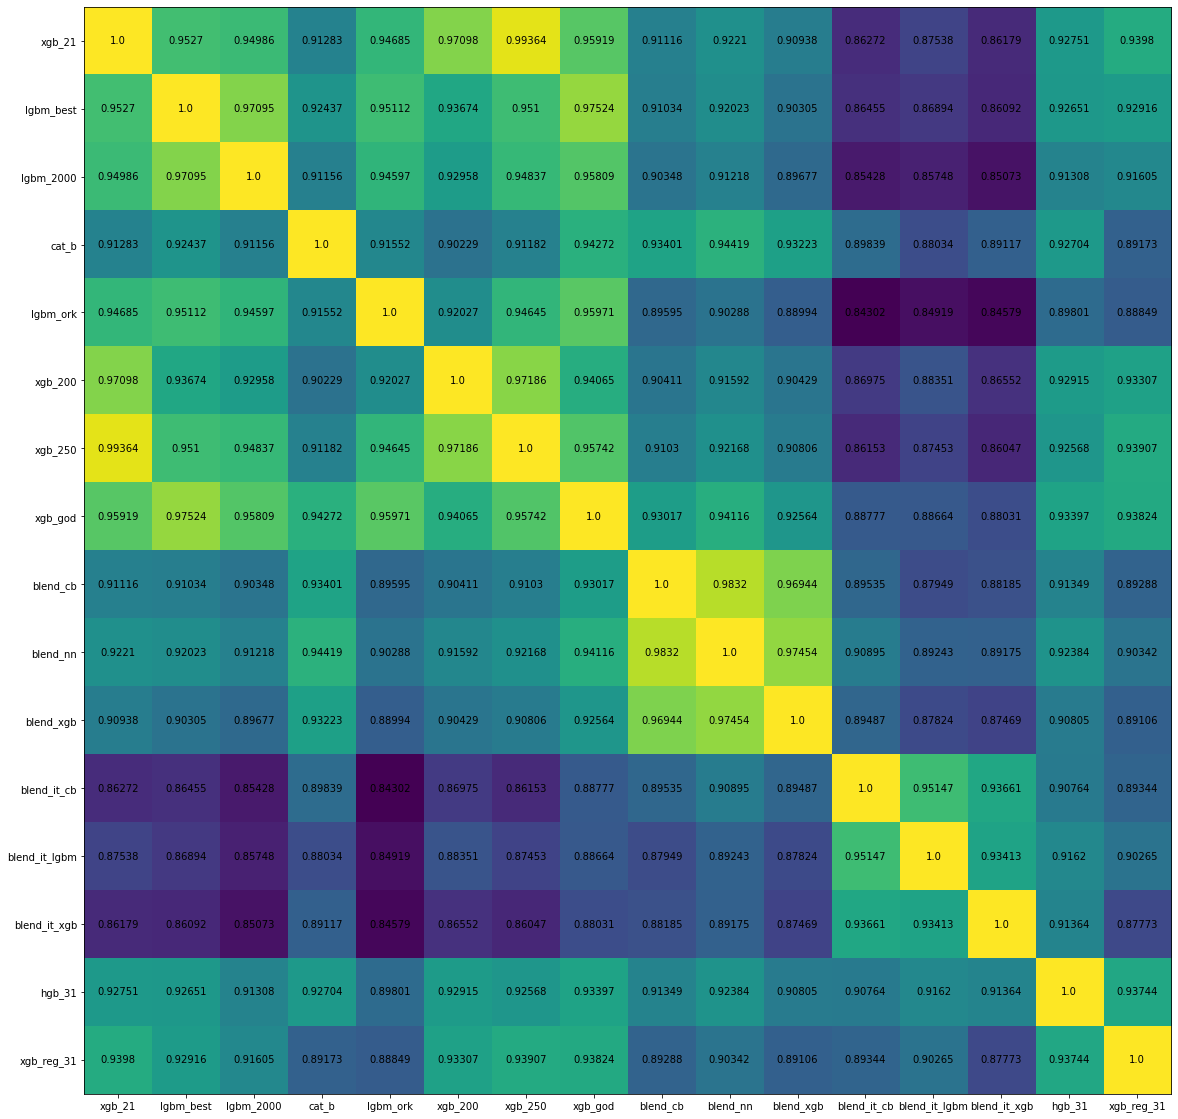

In [12]:
## correlations for best model

import seaborn as sns
import matplotlib.pyplot as plt

data = np.corrcoef(list_of_subs)

fig, ax = plt.subplots(figsize=(20,20))
im = ax.imshow(data)

ax.set_xticks(np.arange(len(group_labels)))
ax.set_yticks(np.arange(len(group_labels)))

ax.set_xticklabels(group_labels)
ax.set_yticklabels(group_labels)

for i in range(len(group_labels)):
    for j in range(len(group_labels)):
        text = ax.text(j, i, data[i, j].round(5),
                       ha="center", va="center")

In [32]:
group_labels

['xgb_21',
 'lgbm_best',
 'lgbm_2000',
 'cat_b',
 'lgbm_ork',
 'xgb_200',
 'xgb_250',
 'xgb_god',
 'blend_cb',
 'blend_nn',
 'blend_xgb',
 'blend_it_cb',
 'blend_it_lgbm',
 'blend_it_xgb',
 'hgb_31',
 'xgb_31',
 'xgb_reg_31']

In [14]:
# 1- 5 - 4 - 6 - 2 - 11 - 8 - 3 - 7 - 9 - 10 - 15 - 12 -13 - 16 - 14 
submission = pd.read_csv('https://raw.githubusercontent.com/mainadwitiya/Kaggle-song-popularity/main/csv/sample_submission.csv?token=GHSAT0AAAAAABPK7AEBRCWHNXSG34VUOTD6YP2254Q')
ensemble = submission.copy()
power = 16
ensemble.loc[:,'song_popularity'] = ((xgb_21 ** power + lgbm_best ** power 
                                      + xgb_250 ** power + xgb_god ** power
                                      + lgbm_2000 ** power + cat_b ** power
                                      + lgbm_ork ** power +  xgb_200 ** power ) / 8
                                     + (blend_cb ** power + blend_nn ** power 
                                        + blend_xgb ** power) / 3 
                                     + (blend_it_cb ** power + blend_it_lgbm ** power 
                                        + blend_it_xgb ** power + hgb_31 ** power 
                                        + xgb_reg_31 ** power ) / 5
                                     ) / 3
 
 




 

In [16]:
ensemble.to_csv('submission_power_avg_16.csv', index= False)

In [17]:
ensemble

,id,song_popularity
0,0,6.988417e-07
1,1,4.857634e-06
2,2,3.482425e-09
3,3,1.279424e-08
4,4,1.601322e-07
...,...,...
9995,9995,4.238098e-08
9996,9996,4.958105e-09
9997,9997,6.777243e-08
9998,9998,2.148197e-06
